In [137]:
import numpy as np
from matplotlib import pyplot as plt
import random

def draw_1_line ( title, xlabel, ylabel, l1, color1, withDotsOrNot ):
    l0 = np.arange(1, np.size(l1)+1, 1)
    fig = plt.figure() 
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, linewidth=2  ) # draw a line
    if withDotsOrNot == "with dots":
        plt.scatter (l0, l1, c=color1, s=40) # draw dots.  s: marker size
    ax.legend()
    plt.xlabel(xlabel ) 
    plt.ylabel(ylabel )
    plt.title(title )
    plt.savefig('D:/Sweden/p3/ANN/lab3/'+ title + '.png', dpi=300)
    plt.show()

def draw_2_lines (title, l1, color1, label1, l2, color2, label2, ymin= 0, ymax= 40):
    l0 = np.arange(1, np.size(l1)+1, 1)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label=label1 )
    ax.plot(l0, l2, c=color2, label=label2 )
    ax.legend()
    ax.set_ylabel ("number of training patterns")
    ax.set_xlabel ("number of stable patterns")
    ax.set_title(title)
    xmin=1
    xmax=300
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    plt.savefig('D:/Sweden/p3/ANN/lab3/'+ title + '.png', dpi=300)
    plt.show()  
    

def energy(pattern, weight):
    energy = np.zeros ((1,len (pattern)))
    for i in range (0, len (pattern)): 
        m = np.dot(pattern[i], weight)
        energy[0][i] = -1 * np.dot(m, pattern[i].transpose())
        
    return energy[0][0]

def sign_fxn(x):
    return np.where(x < 0, -1, 1)



def distort_pattern (pic_data, nb_distorted_bits ):
    indicies = np.arange(len(pic_data[0]))
    np.random.shuffle(indicies)
    pic_data_distorted = np.copy(pic_data)
    for pattern_idx in range (0,len(pic_data_distorted) ):
        for i in range(nb_distorted_bits):
            pic_data_distorted[pattern_idx][indicies[i]] = -1 * pic_data[pattern_idx][indicies[i]]
        
    return pic_data_distorted

def show_img (title ,pic_data_distorted):
    print (title)
    for i in range (0, len (pic_data_distorted) ):
        actual_from_distorted = np.reshape(pic_data_distorted[i], (32, 32))
        plt.imshow(actual_from_distorted, interpolation='nearest')
        plt.show()    
    return 




def store_patterns(input_pattern):
        weight_matrix = np.dot(input_pattern.transpose(), input_pattern)
        output_pattern = sign_fxn(np.dot(input_pattern, weight_matrix))
        print ("nb non zeros",np.count_nonzero (input_pattern - output_pattern) )
#         print("has the weight memorized the patterns?",np.array_equal(input_pattern, output_pattern)) #to check if the network was able to store the patterns
        return weight_matrix

def check_convergence_batch(input_pattern, weight_matrix, distorted_pattern, max_iterations, showImgOrNot):
    iterations = 0
    while not np.array_equal(input_pattern, distorted_pattern) and iterations < max_iterations:
        distorted_pattern = sign_fxn(np.dot(distorted_pattern, weight_matrix))
        iterations += 1
    stable_or_not = np.array_equal(input_pattern, distorted_pattern)
#     print("is it stable? ",stable_or_not)
    if showImgOrNot == "show img":
        show_img ("img after updating" ,distorted_pattern) 
    return stable_or_not 


########################################

## 3.5.1

nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 379
nb non zeros 449
nb non zeros 801
nb non zeros 914
nb non zeros 1127
nb non zeros 1383
nb non zeros 1555
nb non zeros 1541


No handles with labels found to put in legend.


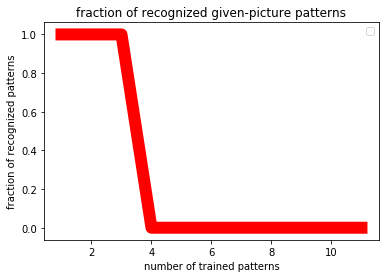

In [45]:

def test_picture_patterns (max_nb_patterns):
    recognize_list = []
    pic_data = np.loadtxt('data/pict.dat', delimiter = ',', dtype = 'i')
    rows_pic_data = int(pic_data.shape[0]/1024)
    pic_data = np.reshape(pic_data, (rows_pic_data,1024))
    
    nb_neurons = 1024
    flip_percentage = 0.1
    nb_flip_bits = int (nb_neurons * flip_percentage)
    distorted_pattern = distort_pattern (pic_data,nb_flip_bits)
    
    for nb_patterns in range (1, max_nb_patterns+1):
        memorized_pattern_stack = np.copy(pic_data[0:nb_patterns,:])
        distorted_pattern_stack = np.copy(distorted_pattern[0:nb_patterns,:])
        weight_matrix = store_patterns(memorized_pattern_stack)
        sum_recognize = 0
        for j in range (nb_patterns):
            max_iterations = 5
            stable_or_not = check_convergence_batch(memorized_pattern_stack, weight_matrix, distorted_pattern_stack, max_iterations, "not show img")
            sum_recognize = sum_recognize + np.where(stable_or_not == True, 1, 0)
        recognize_list.append (sum_recognize / nb_patterns )
    
    return recognize_list

max_nb_patterns = 11
recognized_list_given_picture =test_picture_patterns (max_nb_patterns)


No handles with labels found to put in legend.


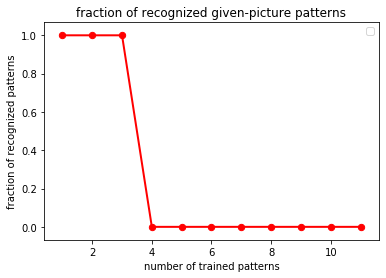

In [53]:
draw_1_line ( "fraction of recognized given-picture patterns","number of trained patterns", "fraction of recognized patterns", recognized_list_given_picture, 'r', "with dots" )

## 3.5.2

In [132]:

def create_random_patterns (nb_patterns, nb_neurons, biased_mean):
    random_patterns= np.zeros ((nb_patterns, nb_neurons))
    for i in range (nb_patterns):
        for j in range (nb_neurons):
            a_value= random.gauss(biased_mean, 1)  # std variance =1
            random_patterns[i][j] = sign_fxn ( a_value )
    return random_patterns

# test: how many random patterns can we store? 

def test (max_nb_patterns):
    recognize_list = []
    nb_neurons=1024
    flip_percentage = 0.1
    nb_flip_bits = int (nb_neurons * flip_percentage)
    
    for nb_patterns in range (1, max_nb_patterns+1):
        print ("nb_patterns:", nb_patterns)
        random_patterns = create_random_patterns (nb_patterns, nb_neurons, biased_mean=0)
        weight_matrix = store_patterns(random_patterns)
        distorted_pattern_stack = distort_pattern (random_patterns, nb_flip_bits)
        sum_recognize = 0
        for j in range (nb_patterns):
            max_iterations = 5
            stable_or_not = check_convergence_batch(random_patterns[j], weight_matrix, distorted_pattern_stack[j], max_iterations, "dont show img")
            sum_recognize = sum_recognize + np.where(stable_or_not == True, 1, 0)
        recognize_list.append (sum_recognize / nb_patterns )             
    return recognize_list

max_nb_patterns= 300
recognize_list = test (max_nb_patterns)


nb_patterns: 1
nb non zeros 0
nb_patterns: 2
nb non zeros 0
nb_patterns: 3
nb non zeros 0
nb_patterns: 4
nb non zeros 0
nb_patterns: 5
nb non zeros 0
nb_patterns: 6
nb non zeros 0
nb_patterns: 7
nb non zeros 0
nb_patterns: 8
nb non zeros 0
nb_patterns: 9
nb non zeros 0
nb_patterns: 10
nb non zeros 0
nb_patterns: 11
nb non zeros 0
nb_patterns: 12
nb non zeros 0
nb_patterns: 13
nb non zeros 0
nb_patterns: 14
nb non zeros 0
nb_patterns: 15
nb non zeros 0
nb_patterns: 16
nb non zeros 0
nb_patterns: 17
nb non zeros 0
nb_patterns: 18
nb non zeros 0
nb_patterns: 19
nb non zeros 0
nb_patterns: 20
nb non zeros 0
nb_patterns: 21
nb non zeros 0
nb_patterns: 22
nb non zeros 0
nb_patterns: 23
nb non zeros 0
nb_patterns: 24
nb non zeros 0
nb_patterns: 25
nb non zeros 0
nb_patterns: 26
nb non zeros 0
nb_patterns: 27
nb non zeros 0
nb_patterns: 28
nb non zeros 0
nb_patterns: 29
nb non zeros 0
nb_patterns: 30
nb non zeros 0
nb_patterns: 31
nb non zeros 0
nb_patterns: 32
nb non zeros 0
nb_patterns: 33
n

nb_patterns: 251
nb non zeros 1535
nb_patterns: 252
nb non zeros 1546
nb_patterns: 253
nb non zeros 1527
nb_patterns: 254
nb non zeros 1527
nb_patterns: 255
nb non zeros 1657
nb_patterns: 256
nb non zeros 1641
nb_patterns: 257
nb non zeros 1539
nb_patterns: 258
nb non zeros 1646
nb_patterns: 259
nb non zeros 1548
nb_patterns: 260
nb non zeros 1693
nb_patterns: 261
nb non zeros 1776
nb_patterns: 262
nb non zeros 1738
nb_patterns: 263
nb non zeros 1813
nb_patterns: 264
nb non zeros 1799
nb_patterns: 265
nb non zeros 1706
nb_patterns: 266
nb non zeros 1748
nb_patterns: 267
nb non zeros 1778
nb_patterns: 268
nb non zeros 1903
nb_patterns: 269
nb non zeros 1754
nb_patterns: 270
nb non zeros 1798
nb_patterns: 271
nb non zeros 1849
nb_patterns: 272
nb non zeros 1949
nb_patterns: 273
nb non zeros 2003
nb_patterns: 274
nb non zeros 1950
nb_patterns: 275
nb non zeros 1903
nb_patterns: 276
nb non zeros 2179
nb_patterns: 277
nb non zeros 2083
nb_patterns: 278
nb non zeros 2083
nb_patterns: 279
nb 

No handles with labels found to put in legend.


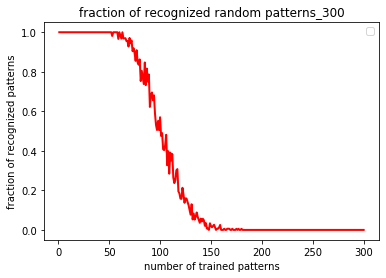

In [138]:
draw_1_line ( "fraction of recognized random patterns_300","number of trained patterns", "fraction of recognized patterns", recognize_list, 'r', "without dots")

##  3.5.4 to 3.5.7

In [100]:
 
    
def test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise):
    nb_neurons = 100
    flip_percentage = 0.05
    nb_flip_bits = int (nb_neurons * flip_percentage)
    total_stable_list = []
    for i in range (1, max_nb_patterns+1):
        nb_patterns=i
        random_patterns = create_random_patterns (nb_patterns, nb_neurons, biased_mean)
        weight_matrix = store_patterns(random_patterns)
        if remove_self_connection == "remove self connection": 
            np.fill_diagonal(weight_matrix, 0)
        
        if (noise == "flip") :
            distorted_pattern_stack = distort_pattern (random_patterns, nb_flip_bits)
        elif (noise == "no flip") : 
            distorted_pattern_stack=  np.copy(random_patterns) 
        
        sum_stable = 0
        for j in range (len(distorted_pattern_stack)):
            max_iterations =5
            stable_or_not = check_convergence_batch(random_patterns[j], weight_matrix, distorted_pattern_stack[j], max_iterations, "dont show img")
            one = np.where(stable_or_not == True, 1, 0)
            sum_stable += one
        total_stable_list.append (sum_stable) 
    print ("total_stable_list",total_stable_list)
    return total_stable_list


    
max_nb_patterns= 300
remove_self_connection = "keep self connection"
noise = "no flip"
biased_mean=0
total_nb_stable_patterns_list_keepSelfConn_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)

noise = "flip"
total_nb_stable_patterns_list_keepSelfConn_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)


nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 1
nb non zeros 0
nb non zeros 2
nb non zeros 0
nb non zeros 0
nb non zeros 4
nb non zeros 5
nb non zeros 5
nb non zeros 12
nb non zeros 10
nb non zeros 9
nb non zeros 20
nb non zeros 11
nb non zeros 23
nb non zeros 17
nb non zeros 14
nb non zeros 15
nb non zeros 29
nb non zeros 23
nb non zeros 22
nb non zeros 36
nb non zeros 34
nb non zeros 33
nb non zeros 40
nb non zeros 51
nb non zeros 53
nb non zeros 44
nb non zeros 48
nb non zeros 53
nb non zeros 58
nb non zeros 51
nb non zeros 61
nb non zeros 54
nb non zeros 61
nb non zeros 66
nb non zeros 73
nb non zeros 67
nb non zeros 72
nb non zeros 62
nb non zeros 73
nb non zeros 88
nb non zeros 89
nb non zeros 121
nb non zeros 108
nb non zeros 115
nb non zeros 85
nb non zeros 91
nb non zeros 109
nb non zeros 125
nb non zeros 123
nb non zeros 141
nb non

nb non zeros 242
nb non zeros 227
nb non zeros 258
nb non zeros 227
nb non zeros 213
nb non zeros 261
nb non zeros 243
nb non zeros 232
nb non zeros 241
nb non zeros 282
nb non zeros 254
nb non zeros 287
nb non zeros 288
nb non zeros 258
nb non zeros 239
nb non zeros 265
nb non zeros 282
nb non zeros 283
nb non zeros 314
nb non zeros 278
nb non zeros 264
nb non zeros 299
nb non zeros 274
nb non zeros 266
nb non zeros 274
nb non zeros 316
nb non zeros 278
nb non zeros 285
nb non zeros 290
nb non zeros 292
nb non zeros 345
nb non zeros 319
nb non zeros 330
nb non zeros 299
nb non zeros 283
nb non zeros 286
nb non zeros 304
nb non zeros 253
nb non zeros 313
nb non zeros 346
nb non zeros 306
nb non zeros 290
nb non zeros 302
nb non zeros 280
nb non zeros 278
nb non zeros 298
nb non zeros 340
nb non zeros 292
nb non zeros 349
nb non zeros 349
nb non zeros 292
nb non zeros 298
nb non zeros 320
nb non zeros 326
nb non zeros 329
nb non zeros 334
nb non zeros 309
nb non zeros 307
nb non zeros 2

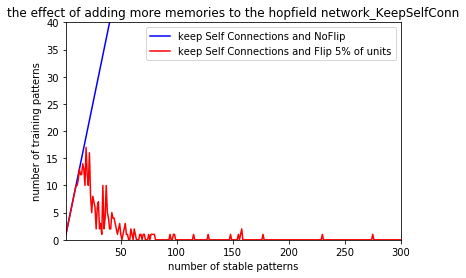

In [104]:
   
draw_2_lines ('the effect of adding more memories to the hopfield network_KeepSelfConn',
              total_nb_stable_patterns_list_keepSelfConn_NoFlip, 'b', 'keep Self Connections and NoFlip',
              total_nb_stable_patterns_list_keepSelfConn_Flip,   'r', 'keep Self Connections and Flip 5% of units')

In [67]:
remove_self_connection = "remove self connection" 
biased_mean = 0
noise = "no flip"
total_nb_stable_patterns_list_removeSelfConn_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)
noise = "flip"
total_nb_stable_patterns_list_removeSelfConn_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)

nb non zeros 0
distorted_pattern_stack.shape (1, 100)
nb non zeros 0
distorted_pattern_stack.shape (2, 100)
nb non zeros 0
distorted_pattern_stack.shape (3, 100)
nb non zeros 0
distorted_pattern_stack.shape (4, 100)
nb non zeros 0
distorted_pattern_stack.shape (5, 100)
nb non zeros 0
distorted_pattern_stack.shape (6, 100)
nb non zeros 0
distorted_pattern_stack.shape (7, 100)
nb non zeros 0
distorted_pattern_stack.shape (8, 100)
nb non zeros 0
distorted_pattern_stack.shape (9, 100)
nb non zeros 0
distorted_pattern_stack.shape (10, 100)
nb non zeros 0
distorted_pattern_stack.shape (11, 100)
nb non zeros 0
distorted_pattern_stack.shape (12, 100)
nb non zeros 0
distorted_pattern_stack.shape (13, 100)
nb non zeros 0
distorted_pattern_stack.shape (14, 100)
nb non zeros 1
distorted_pattern_stack.shape (15, 100)
nb non zeros 0
distorted_pattern_stack.shape (16, 100)
nb non zeros 7
distorted_pattern_stack.shape (17, 100)
nb non zeros 6
distorted_pattern_stack.shape (18, 100)
nb non zeros 10
dis

nb non zeros 321
distorted_pattern_stack.shape (148, 100)
nb non zeros 327
distorted_pattern_stack.shape (149, 100)
nb non zeros 283
distorted_pattern_stack.shape (150, 100)
nb non zeros 323
distorted_pattern_stack.shape (151, 100)
nb non zeros 326
distorted_pattern_stack.shape (152, 100)
nb non zeros 342
distorted_pattern_stack.shape (153, 100)
nb non zeros 293
distorted_pattern_stack.shape (154, 100)
nb non zeros 300
distorted_pattern_stack.shape (155, 100)
nb non zeros 306
distorted_pattern_stack.shape (156, 100)
nb non zeros 329
distorted_pattern_stack.shape (157, 100)
nb non zeros 319
distorted_pattern_stack.shape (158, 100)
nb non zeros 310
distorted_pattern_stack.shape (159, 100)
nb non zeros 276
distorted_pattern_stack.shape (160, 100)
nb non zeros 340
distorted_pattern_stack.shape (161, 100)
nb non zeros 338
distorted_pattern_stack.shape (162, 100)
nb non zeros 311
distorted_pattern_stack.shape (163, 100)
nb non zeros 318
distorted_pattern_stack.shape (164, 100)
nb non zeros 3

nb non zeros 308
distorted_pattern_stack.shape (290, 100)
nb non zeros 316
distorted_pattern_stack.shape (291, 100)
nb non zeros 390
distorted_pattern_stack.shape (292, 100)
nb non zeros 292
distorted_pattern_stack.shape (293, 100)
nb non zeros 339
distorted_pattern_stack.shape (294, 100)
nb non zeros 292
distorted_pattern_stack.shape (295, 100)
nb non zeros 277
distorted_pattern_stack.shape (296, 100)
nb non zeros 286
distorted_pattern_stack.shape (297, 100)
nb non zeros 311
distorted_pattern_stack.shape (298, 100)
nb non zeros 342
distorted_pattern_stack.shape (299, 100)
nb non zeros 308
distorted_pattern_stack.shape (300, 100)
total_stable_list [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 

nb non zeros 256
distorted_pattern_stack.shape (113, 100)
nb non zeros 268
distorted_pattern_stack.shape (114, 100)
nb non zeros 249
distorted_pattern_stack.shape (115, 100)
nb non zeros 296
distorted_pattern_stack.shape (116, 100)
nb non zeros 239
distorted_pattern_stack.shape (117, 100)
nb non zeros 246
distorted_pattern_stack.shape (118, 100)
nb non zeros 260
distorted_pattern_stack.shape (119, 100)
nb non zeros 292
distorted_pattern_stack.shape (120, 100)
nb non zeros 242
distorted_pattern_stack.shape (121, 100)
nb non zeros 278
distorted_pattern_stack.shape (122, 100)
nb non zeros 260
distorted_pattern_stack.shape (123, 100)
nb non zeros 248
distorted_pattern_stack.shape (124, 100)
nb non zeros 269
distorted_pattern_stack.shape (125, 100)
nb non zeros 286
distorted_pattern_stack.shape (126, 100)
nb non zeros 315
distorted_pattern_stack.shape (127, 100)
nb non zeros 277
distorted_pattern_stack.shape (128, 100)
nb non zeros 261
distorted_pattern_stack.shape (129, 100)
nb non zeros 2

nb non zeros 311
distorted_pattern_stack.shape (256, 100)
nb non zeros 304
distorted_pattern_stack.shape (257, 100)
nb non zeros 341
distorted_pattern_stack.shape (258, 100)
nb non zeros 333
distorted_pattern_stack.shape (259, 100)
nb non zeros 319
distorted_pattern_stack.shape (260, 100)
nb non zeros 310
distorted_pattern_stack.shape (261, 100)
nb non zeros 370
distorted_pattern_stack.shape (262, 100)
nb non zeros 289
distorted_pattern_stack.shape (263, 100)
nb non zeros 282
distorted_pattern_stack.shape (264, 100)
nb non zeros 340
distorted_pattern_stack.shape (265, 100)
nb non zeros 322
distorted_pattern_stack.shape (266, 100)
nb non zeros 315
distorted_pattern_stack.shape (267, 100)
nb non zeros 353
distorted_pattern_stack.shape (268, 100)
nb non zeros 323
distorted_pattern_stack.shape (269, 100)
nb non zeros 329
distorted_pattern_stack.shape (270, 100)
nb non zeros 316
distorted_pattern_stack.shape (271, 100)
nb non zeros 345
distorted_pattern_stack.shape (272, 100)
nb non zeros 3

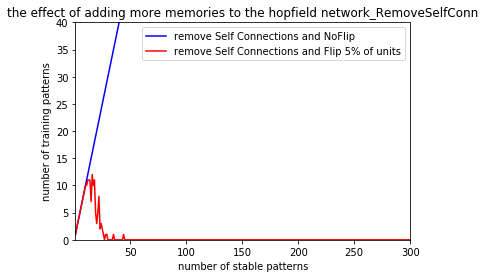

In [123]:
   
draw_2_lines ('the effect of adding more memories to the hopfield network_RemoveSelfConn',
              total_nb_stable_patterns_list_removeSelfConn_NoFlip, 'b', 'remove Self Connections and NoFlip',
              total_nb_stable_patterns_list_removeSelfConn_Flip,'r', 'remove Self Connections and Flip 5% of units')

In [113]:
remove_self_connection = "remove self connection" 
biased_mean = 0.5
noise = "no flip"
total_nb_stable_patterns_list_removeSelfConn_biased_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)

noise = "flip"
total_nb_stable_patterns_list_removeSelfConn_biased_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)


nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 0
nb non zeros 7
nb non zeros 0
nb non zeros 34
nb non zeros 47
nb non zeros 47
nb non zeros 84
nb non zeros 54
nb non zeros 139
nb non zeros 136
nb non zeros 149
nb non zeros 140
nb non zeros 116
nb non zeros 243
nb non zeros 261
nb non zeros 265
nb non zeros 223
nb non zeros 315
nb non zeros 333
nb non zeros 416
nb non zeros 460
nb non zeros 475
nb non zeros 435
nb non zeros 574
nb non zeros 566
nb non zeros 578
nb non zeros 689
nb non zeros 659
nb non zeros 710
nb non zeros 784
nb non zeros 787
nb non zeros 765
nb non zeros 865
nb non zeros 886
nb non zeros 970
nb non zeros 862
nb non zeros 985
nb non zeros 1101
nb non zeros 1060
nb non zeros 959
nb non zeros 1206
nb non zeros 1155
nb non zeros 1214
nb non zeros 1197
nb non zeros 1258
nb non zeros 1384
nb non zeros 1379
nb non zeros 1412
nb non zeros 1423
nb non zeros 1472
nb non zeros 1532
nb non zeros 1501
nb non zeros 1579
nb non zeros 1515
nb

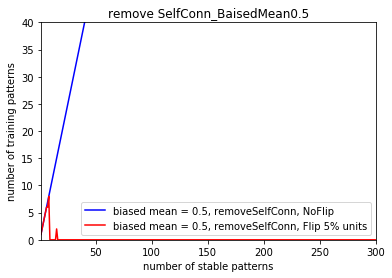

In [91]:
draw_2_lines ('remove SelfConn_BaisedMean0.5',
              total_nb_stable_patterns_list_removeSelfConn_biased_NoFlip, 'b', 'biased mean = 0.5, removeSelfConn, NoFlip',
              total_nb_stable_patterns_list_removeSelfConn_biased_Flip,   'r', 'biased mean = 0.5, removeSelfConn, Flip 5% units')

In [83]:
remove_self_connection = "keep self connection" 
biased_mean = 0.5
noise = "no flip"
total_nb_stable_patterns_list_keep_selfConn_biased_NoFlip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)

noise = "flip"
total_nb_stable_patterns_list_keep_selfConn_biased_Flip = test_1_to_300_patterns (max_nb_patterns, biased_mean, remove_self_connection, noise)


nb non zeros 0
distorted_pattern_stack.shape (1, 100)
nb non zeros 0
distorted_pattern_stack.shape (2, 100)
nb non zeros 0
distorted_pattern_stack.shape (3, 100)
nb non zeros 0
distorted_pattern_stack.shape (4, 100)
nb non zeros 0
distorted_pattern_stack.shape (5, 100)
nb non zeros 0
distorted_pattern_stack.shape (6, 100)
nb non zeros 6
distorted_pattern_stack.shape (7, 100)
nb non zeros 8
distorted_pattern_stack.shape (8, 100)
nb non zeros 35
distorted_pattern_stack.shape (9, 100)
nb non zeros 29
distorted_pattern_stack.shape (10, 100)
nb non zeros 128
distorted_pattern_stack.shape (11, 100)
nb non zeros 88
distorted_pattern_stack.shape (12, 100)
nb non zeros 67
distorted_pattern_stack.shape (13, 100)
nb non zeros 54
distorted_pattern_stack.shape (14, 100)
nb non zeros 104
distorted_pattern_stack.shape (15, 100)
nb non zeros 103
distorted_pattern_stack.shape (16, 100)
nb non zeros 135
distorted_pattern_stack.shape (17, 100)
nb non zeros 277
distorted_pattern_stack.shape (18, 100)
nb n

nb non zeros 4365
distorted_pattern_stack.shape (144, 100)
nb non zeros 4429
distorted_pattern_stack.shape (145, 100)
nb non zeros 4450
distorted_pattern_stack.shape (146, 100)
nb non zeros 4489
distorted_pattern_stack.shape (147, 100)
nb non zeros 4505
distorted_pattern_stack.shape (148, 100)
nb non zeros 4471
distorted_pattern_stack.shape (149, 100)
nb non zeros 4599
distorted_pattern_stack.shape (150, 100)
nb non zeros 4570
distorted_pattern_stack.shape (151, 100)
nb non zeros 4703
distorted_pattern_stack.shape (152, 100)
nb non zeros 4601
distorted_pattern_stack.shape (153, 100)
nb non zeros 4698
distorted_pattern_stack.shape (154, 100)
nb non zeros 4724
distorted_pattern_stack.shape (155, 100)
nb non zeros 4801
distorted_pattern_stack.shape (156, 100)
nb non zeros 4815
distorted_pattern_stack.shape (157, 100)
nb non zeros 4809
distorted_pattern_stack.shape (158, 100)
nb non zeros 4743
distorted_pattern_stack.shape (159, 100)
nb non zeros 4996
distorted_pattern_stack.shape (160, 10

nb non zeros 8769
distorted_pattern_stack.shape (283, 100)
nb non zeros 8678
distorted_pattern_stack.shape (284, 100)
nb non zeros 8601
distorted_pattern_stack.shape (285, 100)
nb non zeros 8641
distorted_pattern_stack.shape (286, 100)
nb non zeros 8876
distorted_pattern_stack.shape (287, 100)
nb non zeros 8864
distorted_pattern_stack.shape (288, 100)
nb non zeros 8932
distorted_pattern_stack.shape (289, 100)
nb non zeros 8920
distorted_pattern_stack.shape (290, 100)
nb non zeros 9086
distorted_pattern_stack.shape (291, 100)
nb non zeros 9016
distorted_pattern_stack.shape (292, 100)
nb non zeros 9019
distorted_pattern_stack.shape (293, 100)
nb non zeros 9018
distorted_pattern_stack.shape (294, 100)
nb non zeros 9092
distorted_pattern_stack.shape (295, 100)
nb non zeros 9042
distorted_pattern_stack.shape (296, 100)
nb non zeros 9200
distorted_pattern_stack.shape (297, 100)
nb non zeros 9045
distorted_pattern_stack.shape (298, 100)
nb non zeros 9271
distorted_pattern_stack.shape (299, 10

nb non zeros 3022
distorted_pattern_stack.shape (101, 100)
nb non zeros 3017
distorted_pattern_stack.shape (102, 100)
nb non zeros 3069
distorted_pattern_stack.shape (103, 100)
nb non zeros 3100
distorted_pattern_stack.shape (104, 100)
nb non zeros 3087
distorted_pattern_stack.shape (105, 100)
nb non zeros 3172
distorted_pattern_stack.shape (106, 100)
nb non zeros 3214
distorted_pattern_stack.shape (107, 100)
nb non zeros 3212
distorted_pattern_stack.shape (108, 100)
nb non zeros 3177
distorted_pattern_stack.shape (109, 100)
nb non zeros 3320
distorted_pattern_stack.shape (110, 100)
nb non zeros 3342
distorted_pattern_stack.shape (111, 100)
nb non zeros 3345
distorted_pattern_stack.shape (112, 100)
nb non zeros 3372
distorted_pattern_stack.shape (113, 100)
nb non zeros 3483
distorted_pattern_stack.shape (114, 100)
nb non zeros 3497
distorted_pattern_stack.shape (115, 100)
nb non zeros 3512
distorted_pattern_stack.shape (116, 100)
nb non zeros 3504
distorted_pattern_stack.shape (117, 10

nb non zeros 7432
distorted_pattern_stack.shape (241, 100)
nb non zeros 7357
distorted_pattern_stack.shape (242, 100)
nb non zeros 7480
distorted_pattern_stack.shape (243, 100)
nb non zeros 7467
distorted_pattern_stack.shape (244, 100)
nb non zeros 7529
distorted_pattern_stack.shape (245, 100)
nb non zeros 7576
distorted_pattern_stack.shape (246, 100)
nb non zeros 7624
distorted_pattern_stack.shape (247, 100)
nb non zeros 7642
distorted_pattern_stack.shape (248, 100)
nb non zeros 7600
distorted_pattern_stack.shape (249, 100)
nb non zeros 7705
distorted_pattern_stack.shape (250, 100)
nb non zeros 7767
distorted_pattern_stack.shape (251, 100)
nb non zeros 7696
distorted_pattern_stack.shape (252, 100)
nb non zeros 7818
distorted_pattern_stack.shape (253, 100)
nb non zeros 7948
distorted_pattern_stack.shape (254, 100)
nb non zeros 7819
distorted_pattern_stack.shape (255, 100)
nb non zeros 7876
distorted_pattern_stack.shape (256, 100)
nb non zeros 7819
distorted_pattern_stack.shape (257, 10

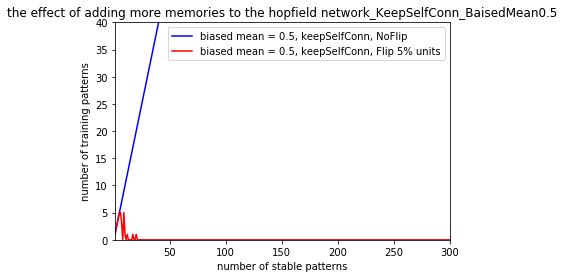

In [92]:
draw_2_lines ('the effect of adding more memories to the hopfield network_KeepSelfConn_BaisedMean0.5',
              total_nb_stable_patterns_list_keep_selfConn_biased_NoFlip, 'b', 'biased mean = 0.5, keepSelfConn, NoFlip',
              total_nb_stable_patterns_list_keep_selfConn_biased_Flip,   'r', 'biased mean = 0.5, keepSelfConn, Flip 5% units')

## summrize

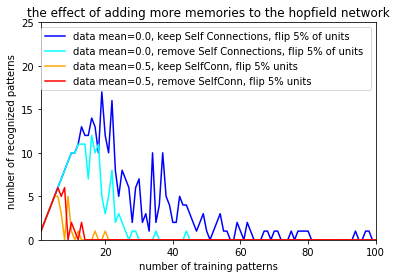

In [126]:
def draw_4_lines (title, l1, color1, label1, 
                  l2, color2, label2, 
                  l3, color3, label3,
                  l4, color4, label4,
                  xmin= 1 ,xmax= 50,
                  ymin= 0, ymax= 20):
    l0 = np.arange(1, np.size(l1)+1, 1)
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.plot(l0, l1, c=color1, label=label1 )
    ax.plot(l0, l2, c=color2, label=label2 )
    ax.plot(l0, l3, c=color3, label=label3 )
    ax.plot(l0, l4, c=color4, label=label4 )
    ax.legend()
    ax.set_ylabel ("number of recognized patterns")
    ax.set_xlabel ("number of training patterns")
    ax.set_title(title)
    ax.set_xlim([xmin,xmax])
    ax.set_ylim([ymin,ymax])
    plt.savefig('D:/Sweden/p3/ANN/lab3/'+ title + '.png', dpi=300)
    plt.show() 
    
    
draw_4_lines ('the effect of adding more memories to the hopfield network',
              total_nb_stable_patterns_list_keepSelfConn_Flip,                 'blue',   'data mean=0.0, keep Self Connections, flip 5% of units ',
              total_nb_stable_patterns_list_removeSelfConn_Flip,                'cyan',    'data mean=0.0, remove Self Connections, flip 5% of units ',
              total_nb_stable_patterns_list_keep_selfConn_biased_Flip,         'orange',   'data mean=0.5, keep SelfConn, flip 5% units',    
              total_nb_stable_patterns_list_removeSelfConn_biased_Flip,         'red',     'data mean=0.5, remove SelfConn, flip 5% units',
              xmin= 1 ,xmax= 100, ymin=0, ymax=25)

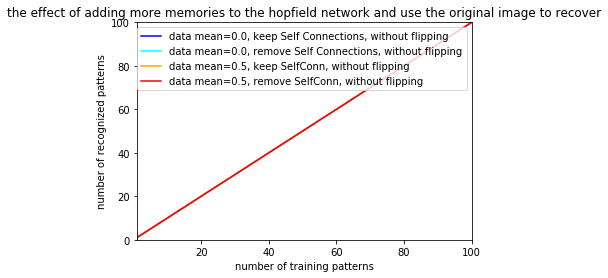

In [131]:

draw_4_lines ('the effect of adding more memories to the hopfield network and use the original image to recover',
              total_nb_stable_patterns_list_keepSelfConn_NoFlip,                 'blue',   'data mean=0.0, keep Self Connections, without flipping',
              total_nb_stable_patterns_list_removeSelfConn_NoFlip,                'cyan',    'data mean=0.0, remove Self Connections, without flipping',
              total_nb_stable_patterns_list_keep_selfConn_biased_NoFlip,         'orange',   'data mean=0.5, keep SelfConn, without flipping',    
              total_nb_stable_patterns_list_removeSelfConn_biased_NoFlip,         'red',     'data mean=0.5, remove SelfConn, without flipping',
              xmin= 1 ,xmax= 100, ymin=0, ymax=100)



## 3.6



In [ ]:
# Sparse patterns -
def sign_fxn_sparse(x):
    return np.where(x < 0, 0, 1)
def create_random_patterns_sparse(nb_patterns, nb_neurons, biased_mean):
    random_patterns= np.zeros ((nb_patterns, nb_neurons))
    for i in range (nb_patterns):
        for j in range (nb_neurons):
            a_value= random.gauss(biased_mean, 1)  # std variance =1
            random_patterns[i][j] = sign_fxn_sparse(a_value)
    return random_patterns
def store_sparse_patterns(input_pattern, activity):
    weight_matrix = np.dot((input_pattern - activity).transpose(), (input_pattern - activity))
    #output_pattern = sign_fxn_sparse(np.dot(input_pattern, weight_matrix))
    return weight_matrix
def check_convergence_sparse(input_pattern, weight_matrix, distorted_pattern, max_iterations, theta):
    iterations = 0
    while not np.array_equal(input_pattern, distorted_pattern) and iterations < max_iterations:
        distorted_pattern = 0.5 + 0.5 * (sign_fxn_sparse(np.dot(distorted_pattern, weight_matrix) - theta))
        iterations += 1
    stable_or_not = np.array_equal(input_pattern, distorted_pattern)
    #print(stable_or_not)
    return stable_or_not
def test_1_to_300_patterns_for_sparse(max_nb_patterns, biased_mean, remove_self_connection, noise):
    nb_neurons = 100
    flip_percentage = 0.05
    nb_flip_bits = int (nb_neurons * flip_percentage)
    total_stable_list = []
    for i in range (1, max_nb_patterns+1):
        nb_patterns=i
        random_patterns = create_random_patterns_sparse(nb_patterns, nb_neurons, biased_mean)
        weight_matrix = store_sparse_patterns(random_patterns, 0.1)
        if remove_self_connection == “remove self connection”:
            np.fill_diagonal(weight_matrix, 0)
        if (noise == “flip”) :
            distorted_pattern_stack = distort_pattern (random_patterns, nb_flip_bits)
        elif (noise == “no flip”) :
            distorted_pattern_stack = np.copy(random_patterns)
        sum_stable = 0
        for j in range (len(distorted_pattern_stack)):
            max_iterations = 5
            stable_or_not = check_convergence_sparse(random_patterns[j], weight_matrix, distorted_pattern_stack[j], max_iterations, biased_mean)
            one = np.where(stable_or_not == True, 1, 0)
            sum_stable += one
        total_stable_list.append (sum_stable)
    print (“total_stable_list”,total_stable_list)
    return total_stable_list

biased_mean = 3
max_nb_patterns= 200
remove_self_connection = “remove self connection”
total_nb_stable_patterns_list_biased_Flip = test_1_to_300_patterns_for_sparse(max_nb_patterns,
                                            biased_mean, remove_self_connection, noise = ‘flip’)